In [42]:
import pandas as pd

In [3]:
train_data=pd.read_csv("/Users/rahulkhatter/Downloads/archive (2)/train.csv")

In [4]:
train_data.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB


In [6]:
train_data.count()

stock_id                   5237980
date_id                    5237980
seconds_in_bucket          5237980
imbalance_size             5237760
imbalance_buy_sell_flag    5237980
reference_price            5237760
matched_size               5237760
far_price                  2343638
near_price                 2380800
bid_price                  5237760
bid_size                   5237980
ask_price                  5237760
ask_size                   5237980
wap                        5237760
target                     5237892
time_id                    5237980
row_id                     5237980
dtype: int64

In [7]:
labels=["far_price","near_price"]
train_data=train_data.drop(labels=labels,axis=1)

In [8]:
train_data=train_data.dropna()

In [9]:
train_data.count()

stock_id                   5237760
date_id                    5237760
seconds_in_bucket          5237760
imbalance_size             5237760
imbalance_buy_sell_flag    5237760
reference_price            5237760
matched_size               5237760
bid_price                  5237760
bid_size                   5237760
ask_price                  5237760
ask_size                   5237760
wap                        5237760
target                     5237760
time_id                    5237760
row_id                     5237760
dtype: int64

In [10]:
#matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [11]:
train_data.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [12]:
train_data["demand_price"]=(train_data["ask_price"]-train_data["bid_price"])/(train_data["ask_price"]+train_data["bid_price"])
train_data["demand_size"]=(train_data["ask_size"]-train_data["bid_size"])/(train_data["ask_size"]+train_data["bid_size"])

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5237760 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   bid_price                float64
 8   bid_size                 float64
 9   ask_price                float64
 10  ask_size                 float64
 11  wap                      float64
 12  target                   float64
 13  time_id                  int64  
 14  row_id                   object 
 15  demand_price             float64
 16  demand_size              float64
dtypes: float64(11), int64(5), object(1)
memory usage: 719.3+ MB


In [14]:
train_data=train_data.drop(["bid_price","ask_price","ask_size","bid_size"],axis=1)

In [15]:
train_data.tail()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,wap,target,time_id,row_id,demand_price,demand_size
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,1.000328,2.310276,26454,480_540_195,0.000058,0.816784
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000819,-8.220077,26454,480_540_196,0.000128,-0.374254
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995797,1.169443,26454,480_540_197,0.000047,0.829388
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999008,-1.540184,26454,480_540_198,0.000120,0.684154
5237979,199,480,540,1884285.71,-1,1.002129,24073677.32,1.002274,-6.530285,26454,480_540_199,0.000159,0.091024


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5237760 entries, 0 to 5237979
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   wap                      float64
 8   target                   float64
 9   time_id                  int64  
 10  row_id                   object 
 11  demand_price             float64
 12  demand_size              float64
dtypes: float64(7), int64(5), object(1)
memory usage: 559.5+ MB


array([[<Axes: xlabel='target', ylabel='target'>,
        <Axes: xlabel='demand_price', ylabel='target'>,
        <Axes: xlabel='demand_size', ylabel='target'>],
       [<Axes: xlabel='target', ylabel='demand_price'>,
        <Axes: xlabel='demand_price', ylabel='demand_price'>,
        <Axes: xlabel='demand_size', ylabel='demand_price'>],
       [<Axes: xlabel='target', ylabel='demand_size'>,
        <Axes: xlabel='demand_price', ylabel='demand_size'>,
        <Axes: xlabel='demand_size', ylabel='demand_size'>]], dtype=object)

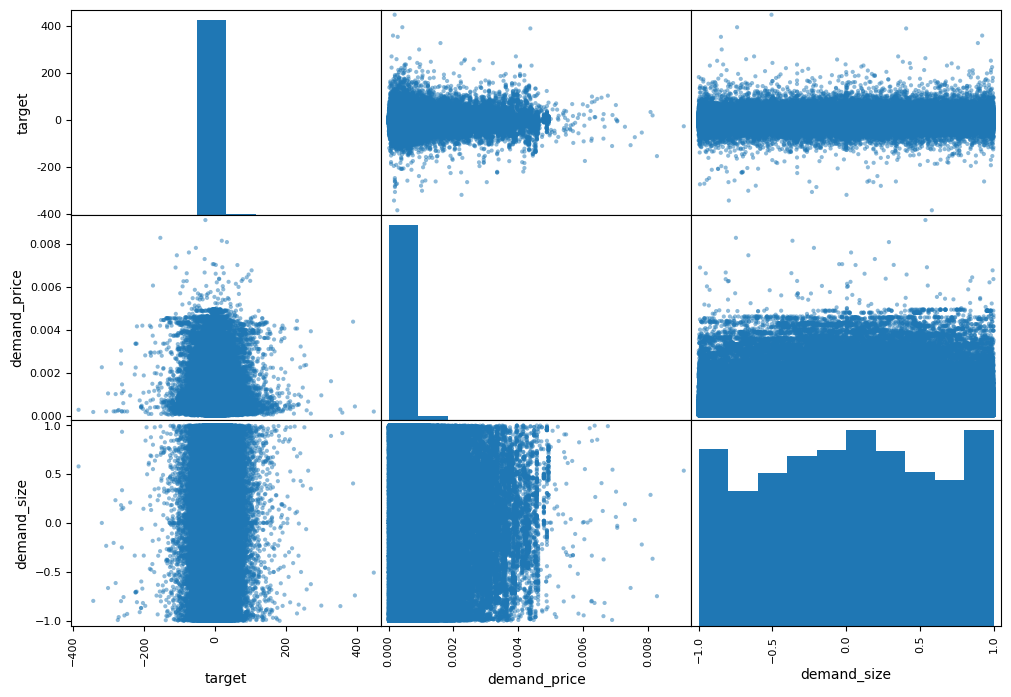

In [17]:
attributes = ["target", "demand_price", "demand_size"]
scatter_matrix(train_data[attributes], figsize=(12, 8))

In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_data, test_size=0.2, random_state=42)

In [19]:
corr_data=train_set.corr()

In [67]:
print(corr_data)

                         stock_id   date_id  seconds_in_bucket  \
stock_id                 1.000000  0.004909           0.000113   
date_id                  0.004909  1.000000           0.000094   
seconds_in_bucket        0.000113  0.000094           1.000000   
imbalance_size           0.024625  0.006573          -0.124335   
imbalance_buy_sell_flag  0.003663 -0.010797          -0.003798   
reference_price         -0.000944 -0.006707          -0.001037   
matched_size             0.035190  0.000565           0.068619   
wap                     -0.000752 -0.007077          -0.001458   
target                   0.000292  0.000861          -0.002076   
time_id                  0.004909  0.999998           0.002177   
row_id                   0.569007  0.446676           0.218704   
demand_price            -0.045774 -0.001965          -0.140272   
demand_size             -0.004087  0.001427           0.002138   

                         imbalance_size  imbalance_buy_sell_flag  \
stock_i

In [21]:
train_set.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,wap,target,time_id,row_id,demand_price,demand_size
4051172,192,373,50,134999.85,1,0.999554,3762140.22,0.999380,5.789995,20520,373_50_192,0.000333,-0.034150
51523,97,4,490,1058362.31,-1,0.998701,7111706.88,0.998715,-2.089739,269,4_490_97,0.000167,0.917175
3066390,124,283,280,5584430.76,1,0.998229,30378055.48,0.998985,15.319586,15593,283_280_124,0.000531,0.777988
579453,196,54,380,1094939.72,-1,0.998795,8234328.49,0.998866,-12.220144,3008,54_380_196,0.000177,0.598304
4954062,82,455,100,59245.79,1,0.992595,382919.63,0.991013,9.390116,25035,455_100_82,0.002179,0.732624


In [22]:
tain_labels=train_set["target"].copy()
train_set=train_set.drop(["target"],axis=1)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
num_attribs = ["seconds_in_bucket","imbalance_size","reference_price","matched_size","wap","demand_price","demand_size"]
cat_attribs = ["imbalance_buy_sell_flag"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        
    ])

In [25]:
train_set_tf=pd.DataFrame(full_pipeline.fit_transform(train_set))

In [26]:
train_set_tf

,0,1,2,3,4,5,6,7,8,9
0,-1.385754,-0.273022,-0.174135,-0.296949,-0.244788,0.217998,-0.084045,0.0,0.0,1.0
1,1.385912,-0.227859,-0.510986,-0.272853,-0.511073,-0.349649,1.557806,1.0,0.0,0.0
2,0.063071,-0.006481,-0.697379,-0.105480,-0.402957,0.899123,1.317589,0.0,0.0,1.0
3,0.692995,-0.226069,-0.473865,-0.264777,-0.450608,-0.315379,1.007480,1.0,0.0,0.0
4,-1.070792,-0.276727,-2.922255,-0.321259,-3.595176,6.548519,1.239297,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4190203,-0.314883,-0.278807,-0.791366,-0.315198,-0.613583,0.260401,-0.646426,1.0,0.0,0.0
4190204,0.063071,-0.192858,0.237748,-0.298792,0.227719,-0.554571,0.561047,0.0,0.0,1.0
4190205,0.692995,-0.237764,0.318702,-0.266133,0.311809,-0.599194,0.571312,0.0,0.0,1.0
4190206,-1.196777,0.014491,-1.019224,-0.110943,-0.928320,0.015442,-0.249754,1.0,0.0,0.0


In [27]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(train_set_tf, tain_labels)

LinearRegression()

In [28]:
import numpy as np

In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, train_set_tf, tain_labels,
                             scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [30]:
from sklearn.metrics import mean_squared_error
train_predictions = lin_reg.predict(train_set_tf)
lin_mse = mean_squared_error(tain_labels, train_predictions) 
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9.370664213162545

In [31]:
tree_rmse_scores

array([9.42920122, 9.35052919, 9.37672876, 9.40148592, 9.37605919,
       9.32742224, 9.36111681, 9.39175727, 9.32344298, 9.36886357])

In [32]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [33]:
from xgboost import XGBRegressor as xgb

In [34]:
xgb_reg=xgb(n_estimators=300, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [35]:
scores = cross_val_score(xgb_reg, train_set_tf, tain_labels,
                             scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [36]:
tree_rmse_scores

array([9.27401596, 9.2072638 , 9.23407773, 9.2529376 , 9.21555954,
       9.17168633, 9.20825499, 9.23490288, 9.1721063 , 9.21277016])

In [37]:
from catboost import CatBoostRegressor

In [38]:
cb_reg = CatBoostRegressor()
cb_reg.fit(train_set_tf, tain_labels)

Learning rate set to 0.15293
0:	learn: 9.4376472	total: 215ms	remaining: 3m 35s
1:	learn: 9.4174770	total: 338ms	remaining: 2m 48s
2:	learn: 9.4022231	total: 567ms	remaining: 3m 8s
3:	learn: 9.3907550	total: 789ms	remaining: 3m 16s
4:	learn: 9.3811358	total: 956ms	remaining: 3m 10s
5:	learn: 9.3743025	total: 1.12s	remaining: 3m 6s
6:	learn: 9.3687719	total: 1.29s	remaining: 3m 3s
7:	learn: 9.3646748	total: 1.47s	remaining: 3m 1s
8:	learn: 9.3607732	total: 1.65s	remaining: 3m 1s
9:	learn: 9.3568015	total: 1.83s	remaining: 3m
10:	learn: 9.3541722	total: 2.01s	remaining: 3m
11:	learn: 9.3520334	total: 2.17s	remaining: 2m 58s
12:	learn: 9.3498922	total: 2.34s	remaining: 2m 57s
13:	learn: 9.3478450	total: 2.5s	remaining: 2m 56s
14:	learn: 9.3457244	total: 2.65s	remaining: 2m 53s
15:	learn: 9.3442363	total: 2.8s	remaining: 2m 52s
16:	learn: 9.3428640	total: 2.96s	remaining: 2m 51s
17:	learn: 9.3410886	total: 3.13s	remaining: 2m 50s
18:	learn: 9.3398120	total: 3.31s	remaining: 2m 50s
19:	lear

In [39]:
scores = cross_val_score(cb_reg, train_set_tf, tain_labels,
                             scoring="neg_mean_squared_error", cv=4)
tree_rmse_scores = np.sqrt(-scores)

Learning rate set to 0.146134
0:	learn: 9.4335037	total: 164ms	remaining: 2m 43s
1:	learn: 9.4138995	total: 253ms	remaining: 2m 6s
2:	learn: 9.3985554	total: 340ms	remaining: 1m 53s
3:	learn: 9.3871356	total: 436ms	remaining: 1m 48s
4:	learn: 9.3783498	total: 592ms	remaining: 1m 57s
5:	learn: 9.3715219	total: 759ms	remaining: 2m 5s
6:	learn: 9.3658654	total: 874ms	remaining: 2m 3s
7:	learn: 9.3613364	total: 993ms	remaining: 2m 3s
8:	learn: 9.3572646	total: 1.12s	remaining: 2m 3s
9:	learn: 9.3537505	total: 1.23s	remaining: 2m 2s
10:	learn: 9.3510072	total: 1.35s	remaining: 2m 1s
11:	learn: 9.3485683	total: 1.48s	remaining: 2m 2s
12:	learn: 9.3464940	total: 1.6s	remaining: 2m 1s
13:	learn: 9.3447568	total: 1.74s	remaining: 2m 2s
14:	learn: 9.3429212	total: 1.92s	remaining: 2m 6s
15:	learn: 9.3408821	total: 2.03s	remaining: 2m 5s
16:	learn: 9.3391547	total: 2.15s	remaining: 2m 4s
17:	learn: 9.3379263	total: 2.28s	remaining: 2m 4s
18:	learn: 9.3367847	total: 2.41s	remaining: 2m 4s
19:	lear

In [40]:
tree_rmse_scores

array([9.25754445, 9.24837313, 9.22173654, 9.22063058])

In [46]:
test_labels=test_set["target"].copy()
test_set=test_set.drop(["target"],axis=1)

In [47]:
test_set_tf=pd.DataFrame(full_pipeline.fit_transform(test_set))

In [58]:
output_cb=cb_reg.predict(test_set_tf)

In [59]:
final_mse = mean_squared_error(test_labels, output_cb) 
final_rmse = np.sqrt(final_mse)

In [60]:
final_rmse

9.206737080757268

In [61]:
print(pd.DataFrame(output))

                0
0       -1.216092
1       -0.474434
2        0.234927
3       -0.401757
4       -0.571715
...           ...
1047547  1.756383
1047548  1.343305
1047549  2.394002
1047550 -1.552516
1047551 -2.954035

[1047552 rows x 1 columns]


In [62]:
cb_reg.feature_importances_

array([14.51343844, 11.71586531, 11.83088534, 14.93588332, 11.45570134,
       16.08088615, 12.21606808,  2.8477491 ,  0.10724307,  4.29627985])

In [63]:
cb_reg.best_score_

{'learn': {'RMSE': 9.132923552857635}}

In [64]:
output_lin=lin_reg.predict(test_set_tf)

In [65]:
final_mse_lin = mean_squared_error(test_labels, output_lin) 
final_rmse_lin = np.sqrt(final_mse_lin)

In [66]:
final_rmse_lin

9.307782734224759

In [70]:
from scipy import stats
confidence = 0.95
squared_errors = (output - test_labels) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([9.16730858, 9.24599745])

In [71]:
test_set["prediced_output"]=output
test_set["actual_output"]=test_labels

In [73]:
test_set.to_csv("/Users/rahulkhatter/Desktop/ML:AI/Projects/US Closing Price/final_output"

         stock_id  date_id  seconds_in_bucket  imbalance_size  \
545457        148       51                280      2903284.43   
219957        149       20                460            0.00   
767086        158       72                110       812947.76   
4898259        79      450                 60      2314043.94   
4053664        84      373                180     63120842.25   
...           ...      ...                ...             ...   
4374437        57      402                270            0.00   
3828478        98      352                470            0.00   
3369243         8      311                 60     18446325.59   
3200639         4      295                430      3225211.72   
3467157       123      320                  0     24600700.23   

         imbalance_buy_sell_flag  reference_price  matched_size       wap  \
545457                         1         1.001695  1.771293e+07  1.001726   
219957                         0         0.999524  1.197422e+07  